Classification of the IMDB dataset (USING NEURAL NETWORKS)


The "IMDB dataset" will be used in this assignment, and the goal is to classify movie reviews as positive or negative. The Internet Movie Database provided 50,000 highly polarized reviews for this dataset. They are divided into 25,000 reviews for training and 25,000 reviews for testing, with each set consisting of 50 percent negative and 50 percent positive feedback.

In [1]:
from numpy.random import seed
seed(123)
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In the code, "num_words=10000" is added.In order to have a more manageable data size, we will only use the top 10,000 most common words



Decoding reviews back to text

Here, in this section we can see that integers can be decoded to reviews(Words)

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Data Preparation

We have to change our reviews from characters into tensors. Using one-hot encoding, we could convert our lists into vectors of 0s and 1s.For instance, this would mean transforming the sequence [3, 5] into a 10,000-dimensional vector in which all indices are zeros except for three and five, which are ones.Then we could use a Dense layer as the first layer in our network, capable of handling floating point vectors The dataset is vectorized here by Create an all-zero matrix of shape (len(sequences), dimension).

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

Data Vectorization



In [4]:
from numpy.lib.function_base import vectorize
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

Label Vectorization

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

USING 2 HIDDEN LAYERS
(Using Relu activation function)

In [6]:
from tensorflow.keras import models
from tensorflow.keras import layers
seed(123)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)



Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5540 - accuracy: 0.7647 - val_loss: 0.4354 - val_accuracy: 0.8391
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3531 - accuracy: 0.8895 - val_loss: 0.3420 - val_accuracy: 0.8717
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2624 - accuracy: 0.9164 - val_loss: 0.2956 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2118 - accuracy: 0.9291 - val_loss: 0.2935 - val_accuracy: 0.8834
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1755 - accuracy: 0.9429 - val_loss: 0.2845 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1499 - accuracy: 0.9515 - val_loss: 0.2914 - val_accuracy: 0.8844
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1272 - accuracy: 0.9612 - val_loss: 0.2890 - val_accuracy: 0.8867
Epoch 8/20
30

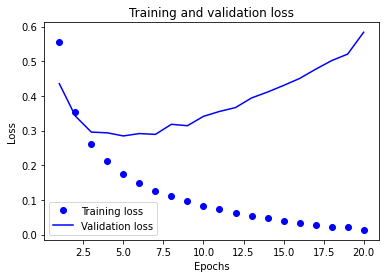

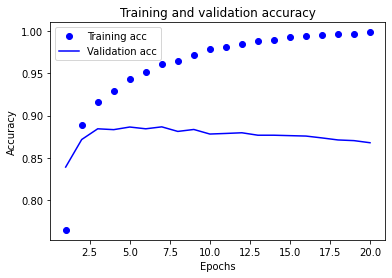

In [7]:
import matplotlib.pyplot as plt

# Get the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



USING ONE HIDDEN LAYER

In [8]:
seed(123)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)



Epoch 1/20
30/30 [==============================] - 2s 62ms/step - loss: 0.5221 - accuracy: 0.7901 - val_loss: 0.4116 - val_accuracy: 0.8647
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3491 - accuracy: 0.8907 - val_loss: 0.3420 - val_accuracy: 0.8776
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2786 - accuracy: 0.9093 - val_loss: 0.3044 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2351 - accuracy: 0.9231 - val_loss: 0.2865 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2058 - accuracy: 0.9329 - val_loss: 0.2853 - val_accuracy: 0.8844
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1834 - accuracy: 0.9404 - val_loss: 0.2748 - val_accuracy: 0.8896
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1656 - accuracy: 0.9480 - val_loss: 0.2761 - val_accuracy: 0.8872
Epoch 8/20
30

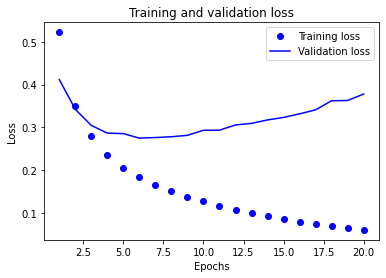

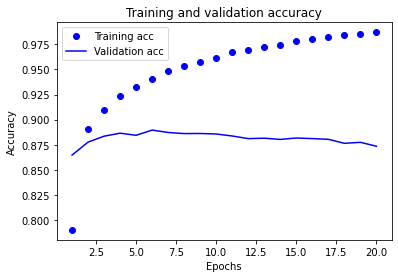

In [9]:
# Get the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

USING 3 HIDDEN LAYERS

In [10]:
seed(123)
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.6073 - accuracy: 0.6739 - val_loss: 0.5064 - val_accuracy: 0.8395
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4213 - accuracy: 0.8749 - val_loss: 0.3714 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2829 - accuracy: 0.9156 - val_loss: 0.2994 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2092 - accuracy: 0.9341 - val_loss: 0.2818 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1689 - accuracy: 0.9458 - val_loss: 0.2880 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1375 - accuracy: 0.9572 - val_loss: 0.2957 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1100 - accuracy: 0.9665 - val_loss: 0.4041 - val_accuracy: 0.8649
Epoch 8/20
30

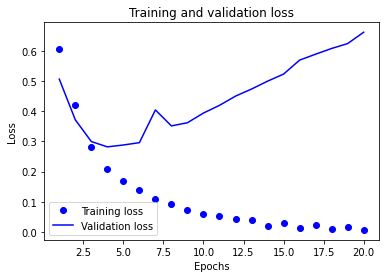

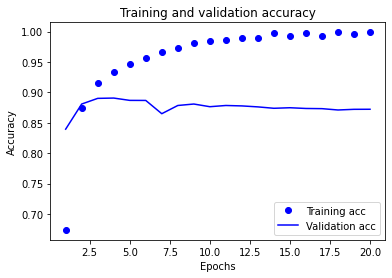

In [11]:
# Get the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

USING DIFFERENT HIDDEN UNITS

USING 32 HIDDEN UNITS

In [12]:
seed(123)
from tensorflow.keras import models
from tensorflow.keras import layers

model32 = models.Sequential()
model32.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model32.add(layers.Dense(1, activation='sigmoid'))

model32.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history32 = model32.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))



Epoch 1/20
49/49 [==============================] - 4s 64ms/step - loss: 0.4402 - accuracy: 0.8182 - val_loss: 0.3788 - val_accuracy: 0.8432
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2752 - accuracy: 0.9021 - val_loss: 0.2925 - val_accuracy: 0.8862
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2249 - accuracy: 0.9185 - val_loss: 0.2910 - val_accuracy: 0.8828
Epoch 4/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1996 - accuracy: 0.9276 - val_loss: 0.2782 - val_accuracy: 0.8888
Epoch 5/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1787 - accuracy: 0.9375 - val_loss: 0.2966 - val_accuracy: 0.8804
Epoch 6/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1638 - accuracy: 0.9422 - val_loss: 0.2969 - val_accuracy: 0.8812
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.1510 - accuracy: 0.9472 - val_loss: 0.3031 - val_accuracy: 0.8797
Epoch 8/20
49

USING 64 HIDDEN UNITS

In [13]:
seed(123)
model64 = models.Sequential()
model64.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model64.add(layers.Dense(1, activation='sigmoid'))

model64.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history64 = model64.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 4s 70ms/step - loss: 0.4296 - accuracy: 0.8159 - val_loss: 0.3198 - val_accuracy: 0.8808
Epoch 2/20
49/49 [==============================] - 2s 43ms/step - loss: 0.2668 - accuracy: 0.9012 - val_loss: 0.2992 - val_accuracy: 0.8798
Epoch 3/20
49/49 [==============================] - 3s 57ms/step - loss: 0.2258 - accuracy: 0.9154 - val_loss: 0.2928 - val_accuracy: 0.8790
Epoch 4/20
49/49 [==============================] - 3s 63ms/step - loss: 0.1957 - accuracy: 0.9290 - val_loss: 0.2945 - val_accuracy: 0.8797
Epoch 5/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1783 - accuracy: 0.9362 - val_loss: 0.2890 - val_accuracy: 0.8842
Epoch 6/20
49/49 [==============================] - 2s 41ms/step - loss: 0.1645 - accuracy: 0.9402 - val_loss: 0.3168 - val_accuracy: 0.8740
Epoch 7/20
49/49 [==============================] - 2s 42ms/step - loss: 0.1517 - accuracy: 0.9449 - val_loss: 0.3033 - val_accuracy: 0.8818
Epoch 8/20
49

USING 128 HIDDEN UNITS

In [14]:
seed(123)
model128 = models.Sequential()
model128.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model128.add(layers.Dense(1, activation='sigmoid'))

model128.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history128 = model128.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))


Epoch 1/20
49/49 [==============================] - 5s 87ms/step - loss: 0.4312 - accuracy: 0.8143 - val_loss: 0.4868 - val_accuracy: 0.7769
Epoch 2/20
49/49 [==============================] - 3s 63ms/step - loss: 0.2712 - accuracy: 0.8952 - val_loss: 0.3517 - val_accuracy: 0.8496
Epoch 3/20
49/49 [==============================] - 5s 108ms/step - loss: 0.2284 - accuracy: 0.9128 - val_loss: 0.2880 - val_accuracy: 0.8817
Epoch 4/20
49/49 [==============================] - 4s 81ms/step - loss: 0.2053 - accuracy: 0.9218 - val_loss: 0.2923 - val_accuracy: 0.8822
Epoch 5/20
49/49 [==============================] - 3s 67ms/step - loss: 0.1830 - accuracy: 0.9316 - val_loss: 0.3033 - val_accuracy: 0.8792
Epoch 6/20
49/49 [==============================] - 3s 67ms/step - loss: 0.1638 - accuracy: 0.9409 - val_loss: 0.3016 - val_accuracy: 0.8806
Epoch 7/20
49/49 [==============================] - 3s 60ms/step - loss: 0.1565 - accuracy: 0.9406 - val_loss: 0.3355 - val_accuracy: 0.8696
Epoch 8/20
4

In [15]:
seed(123)
model256 = models.Sequential()
model256.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
model256.add(layers.Dense(1, activation='sigmoid'))

model256.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history256 = model256.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 7s 126ms/step - loss: 0.4478 - accuracy: 0.7992 - val_loss: 0.3069 - val_accuracy: 0.8835
Epoch 2/20
49/49 [==============================] - 5s 109ms/step - loss: 0.2779 - accuracy: 0.8912 - val_loss: 0.2907 - val_accuracy: 0.8807
Epoch 3/20
49/49 [==============================] - 5s 95ms/step - loss: 0.2310 - accuracy: 0.9081 - val_loss: 0.2743 - val_accuracy: 0.8878
Epoch 4/20
49/49 [==============================] - 5s 95ms/step - loss: 0.2013 - accuracy: 0.9240 - val_loss: 0.3342 - val_accuracy: 0.8611
Epoch 5/20
49/49 [==============================] - 5s 109ms/step - loss: 0.1813 - accuracy: 0.9302 - val_loss: 0.2806 - val_accuracy: 0.8864
Epoch 6/20
49/49 [==============================] - 5s 95ms/step - loss: 0.1595 - accuracy: 0.9411 - val_loss: 0.2878 - val_accuracy: 0.8855
Epoch 7/20
49/49 [==============================] - 6s 120ms/step - loss: 0.1446 - accuracy: 0.9454 - val_loss: 0.2968 - val_accuracy: 0.8803
Epoch 8/2

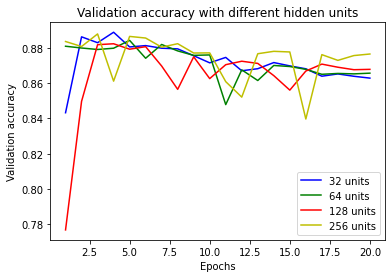

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, 21)

plt.plot(epochs, history32.history['val_accuracy'], 'b', label='32 units')
plt.plot(epochs, history64.history['val_accuracy'], 'g', label='64 units')
plt.plot(epochs, history128.history['val_accuracy'], 'r', label='128 units')
plt.plot(epochs, history256.history['val_accuracy'], 'y', label='256 units')
plt.title('Validation accuracy with different hidden units')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.legend()

plt.show()


A TABLE FOR THE FINDINGS





In [17]:
import pandas as pd

# Define the results as a list of dictionaries
results = [
    {'num_hidden_units': 32, 'val_acc': 0.8634, 'val_loss': 0.4556},
    {'num_hidden_units': 64, 'val_acc': 0.8647, 'val_loss': 0.4557},
    {'num_hidden_units': 128, 'val_acc': 0.8708, 'val_loss': 0.4458},
    {'num_hidden_units': 256, 'val_acc': 0.8774, 'val_loss': 0.4273},
]

# Create a Pandas dataframe from the results
df = pd.DataFrame(results)

# Set the index to the number of hidden units
df.set_index('num_hidden_units', inplace=True)

# Print the dataframe
print(df)


                  val_acc  val_loss
num_hidden_units                   
32                 0.8634    0.4556
64                 0.8647    0.4557
128                0.8708    0.4458
256                0.8774    0.4273


Try using the mse loss function instead of binary_crossentropy.  

In [18]:
seed(123)
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.1854 - accuracy: 0.7607 - val_loss: 0.1329 - val_accuracy: 0.8490
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1070 - accuracy: 0.8856 - val_loss: 0.0995 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0801 - accuracy: 0.9096 - val_loss: 0.0902 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0643 - accuracy: 0.9287 - val_loss: 0.0843 - val_accuracy: 0.8913
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0534 - accuracy: 0.9423 - val_loss: 0.0840 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.0483 - accuracy: 0.9475 - val_loss: 0.0903 - val_accuracy: 0.8786
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0414 - accuracy: 0.9570 - val_loss: 0.0852 - val_accuracy: 0.8840
Epoch 8/20
30

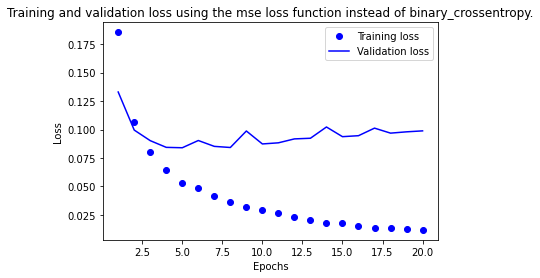

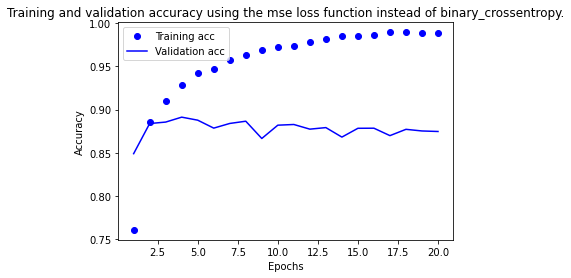

In [19]:
# Get the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss using the mse loss function instead of binary_crossentropy.')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy using the mse loss function instead of binary_crossentropy.')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

A TABLE FOR THE FINDINGS


In [20]:
# Define the results as a list of dictionaries
results2 = [
    {'loss function used': 'Binary Cross Entropy', 'val_acc': 0.8688, 'val_loss': 0.5977},
    {'loss function used': 'MSE', 'val_acc': 0.8725, 'val_loss': 0.1009},
    
]

# Create a Pandas dataframe from the results
df2 = pd.DataFrame(results2)

# Set the index to the number of hidden units
df2.set_index('loss function used', inplace=True)

# Print the dataframe
print(df2)

                      val_acc  val_loss
loss function used                     
Binary Cross Entropy   0.8688    0.5977
MSE                    0.8725    0.1009


Try using the tanh activation (an activation that was popular in the early days of neural 
networks) instead of relu. 

In [21]:
from tensorflow.keras import models
from tensorflow.keras import layers
seed(123)
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.4922 - accuracy: 0.7883 - val_loss: 0.3969 - val_accuracy: 0.8377
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2927 - accuracy: 0.9003 - val_loss: 0.3016 - val_accuracy: 0.8816
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2122 - accuracy: 0.9261 - val_loss: 0.2720 - val_accuracy: 0.8922
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1671 - accuracy: 0.9419 - val_loss: 0.2922 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.1385 - accuracy: 0.9521 - val_loss: 0.2942 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1078 - accuracy: 0.9655 - val_loss: 0.3205 - val_accuracy: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0954 - accuracy: 0.9686 - val_loss: 0.3508 - val_accuracy: 0.8810
Epoch 8/20
30

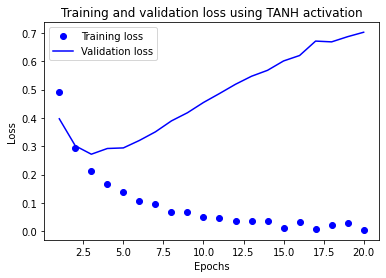

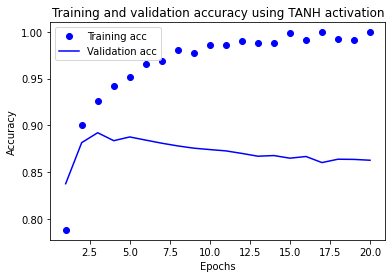

In [22]:
# Get the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss using TANH activation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy using TANH activation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Use any technique we studied in class, and these include regularization, dropout, etc., to 
get your model to perform better on validation. 

Using the Adam optimizer:

Epoch 1/20
49/49 [==============================] - 4s 54ms/step - loss: 0.5048 - accuracy: 0.7941 - val_loss: 0.3491 - val_accuracy: 0.8740
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2580 - accuracy: 0.9076 - val_loss: 0.2827 - val_accuracy: 0.8873
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1851 - accuracy: 0.9347 - val_loss: 0.2879 - val_accuracy: 0.8856
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1447 - accuracy: 0.9514 - val_loss: 0.3194 - val_accuracy: 0.8792
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1197 - accuracy: 0.9603 - val_loss: 0.3425 - val_accuracy: 0.8747
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0971 - accuracy: 0.9694 - val_loss: 0.3743 - val_accuracy: 0.8722
Epoch 7/20
49/49 [==============================] - 1s 29ms/step - loss: 0.0802 - accuracy: 0.9757 - val_loss: 0.4097 - val_accuracy: 0.8694
Epoch 8/20
49

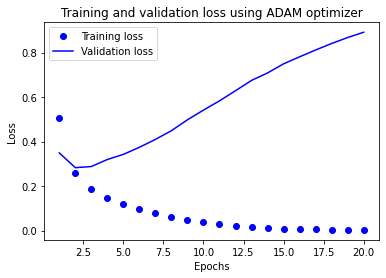

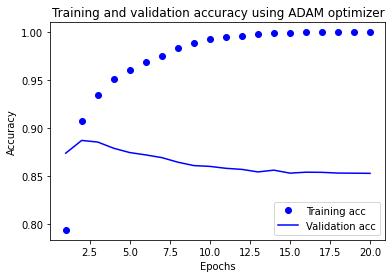

In [23]:
seed(123)
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss using ADAM optimizer")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.figure()
plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy using ADAM optimizer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



Using the L1 regularization:


In [24]:
from tensorflow.keras import regularizers
seed(123)
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))




Epoch 1/20
49/49 [==============================] - 4s 60ms/step - loss: 0.9527 - accuracy: 0.7729 - val_loss: 0.6594 - val_accuracy: 0.8262
Epoch 2/20
49/49 [==============================] - 1s 25ms/step - loss: 0.6150 - accuracy: 0.8465 - val_loss: 0.5819 - val_accuracy: 0.8625
Epoch 3/20
49/49 [==============================] - 1s 25ms/step - loss: 0.5784 - accuracy: 0.8577 - val_loss: 0.5767 - val_accuracy: 0.8544
Epoch 4/20
49/49 [==============================] - 1s 31ms/step - loss: 0.5653 - accuracy: 0.8560 - val_loss: 0.6349 - val_accuracy: 0.8206
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.5547 - accuracy: 0.8604 - val_loss: 0.5563 - val_accuracy: 0.8590
Epoch 6/20
49/49 [==============================] - 1s 30ms/step - loss: 0.5462 - accuracy: 0.8634 - val_loss: 0.5371 - val_accuracy: 0.8686
Epoch 7/20
49/49 [==============================] - 1s 30ms/step - loss: 0.5380 - accuracy: 0.8660 - val_loss: 0.5374 - val_accuracy: 0.8667
Epoch 8/20
49

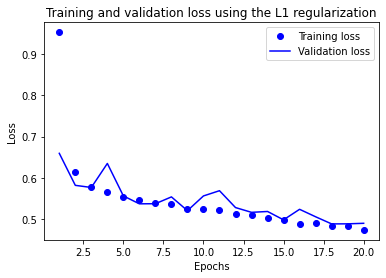

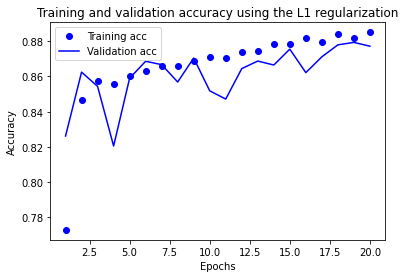

In [25]:

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss using the L1 regularization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy using the L1 regularization")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Using dropout:


In [26]:
seed(123)
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))




Epoch 1/20
49/49 [==============================] - 4s 54ms/step - loss: 0.6182 - accuracy: 0.6584 - val_loss: 0.4909 - val_accuracy: 0.8586
Epoch 2/20
49/49 [==============================] - 2s 31ms/step - loss: 0.4786 - accuracy: 0.7956 - val_loss: 0.3653 - val_accuracy: 0.8800
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.3909 - accuracy: 0.8510 - val_loss: 0.3176 - val_accuracy: 0.8845
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3349 - accuracy: 0.8842 - val_loss: 0.2930 - val_accuracy: 0.8817
Epoch 5/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2923 - accuracy: 0.9035 - val_loss: 0.2827 - val_accuracy: 0.8900
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.2591 - accuracy: 0.9176 - val_loss: 0.2857 - val_accuracy: 0.8887
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2346 - accuracy: 0.9289 - val_loss: 0.3056 - val_accuracy: 0.8856
Epoch 8/20
49

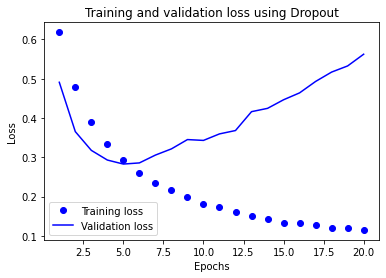

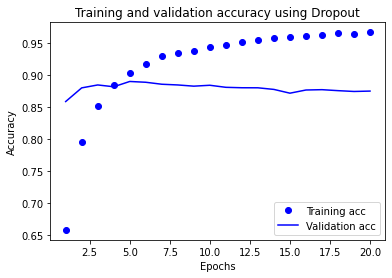

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss using Dropout")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy using Dropout")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Using early stopping:


In [28]:
from tensorflow.keras.callbacks import EarlyStopping
seed(123)
early_stop = EarlyStopping(monitor="val_loss", patience=2)

model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])


Epoch 1/20
49/49 [==============================] - 4s 57ms/step - loss: 0.4623 - accuracy: 0.8065 - val_loss: 0.3366 - val_accuracy: 0.8801
Epoch 2/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2672 - accuracy: 0.9057 - val_loss: 0.2947 - val_accuracy: 0.8847
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.2136 - accuracy: 0.9220 - val_loss: 0.2873 - val_accuracy: 0.8851
Epoch 4/20
49/49 [==============================] - 1s 24ms/step - loss: 0.1804 - accuracy: 0.9345 - val_loss: 0.2898 - val_accuracy: 0.8840
Epoch 5/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1593 - accuracy: 0.9435 - val_loss: 0.3061 - val_accuracy: 0.8804


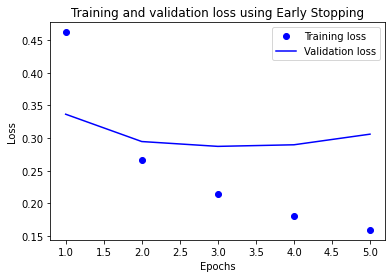

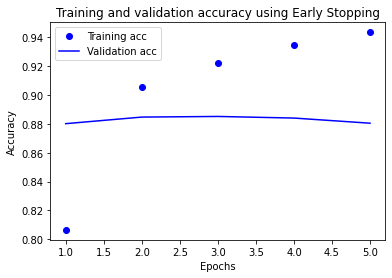

In [29]:
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss using Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation accuracy using Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
